# **Titanic Survival Prediction using Logistic Regression**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('/kaggle/input/titanic/train_data.csv')

In [20]:
df.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [21]:
df.tail()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
787,787,788,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0
791,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Survived     792 non-null    int64  
 3   Sex          792 non-null    int64  
 4   Age          792 non-null    float64
 5   Fare         792 non-null    float64
 6   Pclass_1     792 non-null    int64  
 7   Pclass_2     792 non-null    int64  
 8   Pclass_3     792 non-null    int64  
 9   Family_size  792 non-null    float64
 10  Title_1      792 non-null    int64  
 11  Title_2      792 non-null    int64  
 12  Title_3      792 non-null    int64  
 13  Title_4      792 non-null    int64  
 14  Emb_1        792 non-null    int64  
 15  Emb_2        792 non-null    int64  
 16  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


In [23]:
df2 = pd.read_csv('/kaggle/input/titanic/test_data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64  
 13  Title_4      100 non-null    int64  
 14  Emb_1        100 non-null    int64  
 15  Emb_2        100 non-null    int64  
 16  Emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB


> **Split the Dataset :**

In [24]:
x_train = df.drop(['Unnamed: 0', 'Survived', 'PassengerId'], axis=1)
y_train = df['Survived']

In [25]:
x_test = df.drop(['Unnamed: 0', 'Survived', 'PassengerId'], axis=1)
y_test = df['Survived']

> **Train the Model :**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
pd.DataFrame({'Actutal':y_test, 'Predicted':y_pred})

,Actutal,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
787,0,0
788,1,0
789,0,0
790,0,0


> **Model Evaluation :**

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
score = accuracy_score(y_pred, y_test)
score

0.8194444444444444

In [34]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       511
           1       0.73      0.79      0.76       281

    accuracy                           0.82       792
   macro avg       0.80      0.81      0.81       792
weighted avg       0.82      0.82      0.82       792



> **AUC-ROC Curve :**

In [44]:
from sklearn.metrics import roc_curve, auc

In [46]:
fpr, tpr, threshold = roc_curve(y_test, regressor.predict_proba(x_test)[:,1])


In [48]:
area = auc(fpr, tpr)
area

0.8695634632453806

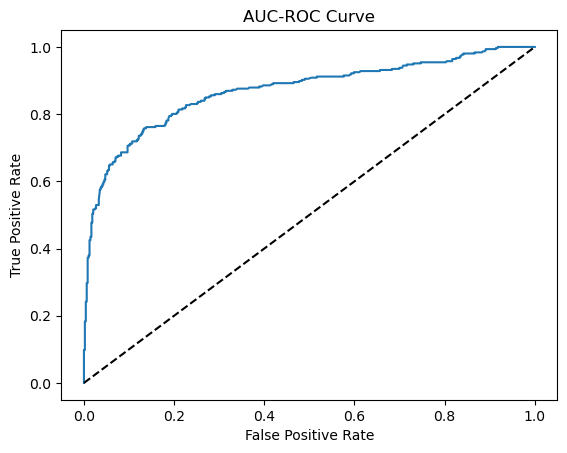

In [55]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()